In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

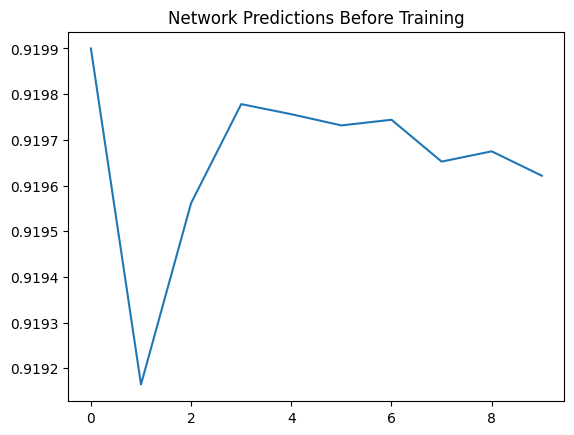

In [7]:

# Step 1: Define the Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()

        # Initialize the layers with random weights
        self.hidden1 = nn.Linear(3, 3)
        self.hidden2 = nn.Linear(3, 3)
        self.hidden3 = nn.Linear(3, 3)
        self.output = nn.Linear(3, 1)

        # Initialize the weights randomly
        self.hidden1.weight = nn.Parameter(torch.rand_like(self.hidden1.weight))
        self.hidden1.bias = nn.Parameter(torch.rand_like(self.hidden1.bias))
        self.hidden2.weight = nn.Parameter(torch.rand_like(self.hidden2.weight))
        self.hidden2.bias = nn.Parameter(torch.rand_like(self.hidden2.bias))
        self.hidden3.weight = nn.Parameter(torch.rand_like(self.hidden3.weight))
        self.hidden3.bias = nn.Parameter(torch.rand_like(self.hidden3.bias))
        self.output.weight = nn.Parameter(torch.rand_like(self.output.weight))
        self.output.bias = nn.Parameter(torch.rand_like(self.output.bias))

    def forward(self, x):
        x = torch.sigmoid(self.hidden1(x))
        x = torch.sigmoid(self.hidden2(x))
        x = torch.sigmoid(self.hidden3(x))
        x = torch.tanh(self.output(x))  # Final activation using Tanh
        return x


input_data = torch.rand((10, 3))


model = SimpleNN()


with torch.no_grad():
    initial_output = model(input_data)


sns.lineplot(x=range(10), y=initial_output.flatten().numpy())
plt.title('Network Predictions Before Training')
plt.show()


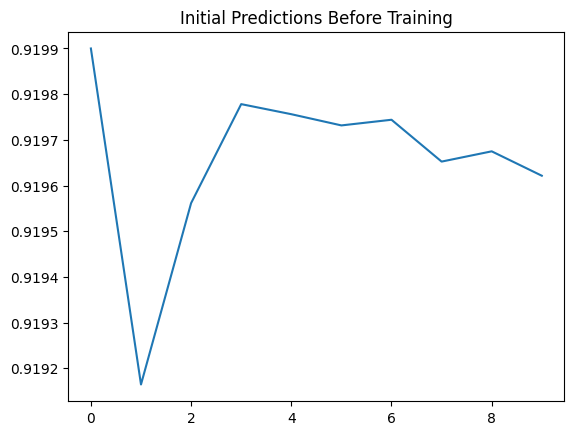

In [8]:
# Step 2: Make the network trainable

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


target = torch.rand((10, 1))

with torch.no_grad():
    initial_predictions = model(input_data)

sns.lineplot(x=range(10), y=initial_predictions.flatten().numpy())
plt.title('Initial Predictions Before Training')
plt.show()


Epoch [10/100], Loss: 0.0987
Epoch [20/100], Loss: 0.0977
Epoch [30/100], Loss: 0.0967
Epoch [40/100], Loss: 0.0957
Epoch [50/100], Loss: 0.0946
Epoch [60/100], Loss: 0.0936
Epoch [70/100], Loss: 0.0925
Epoch [80/100], Loss: 0.0914
Epoch [90/100], Loss: 0.0902
Epoch [100/100], Loss: 0.0891


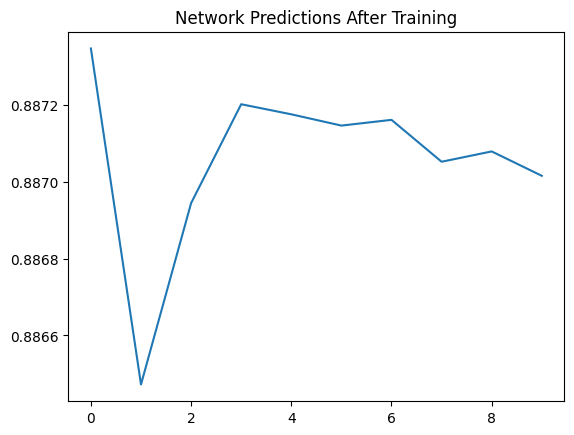

In [9]:
# Step 3: Training loop
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()

    outputs = model(input_data)

    loss = criterion(outputs, target)

    loss.backward()

    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    final_predictions = model(input_data)

sns.lineplot(x=range(10), y=final_predictions.flatten().numpy())
plt.title('Network Predictions After Training')
plt.show()


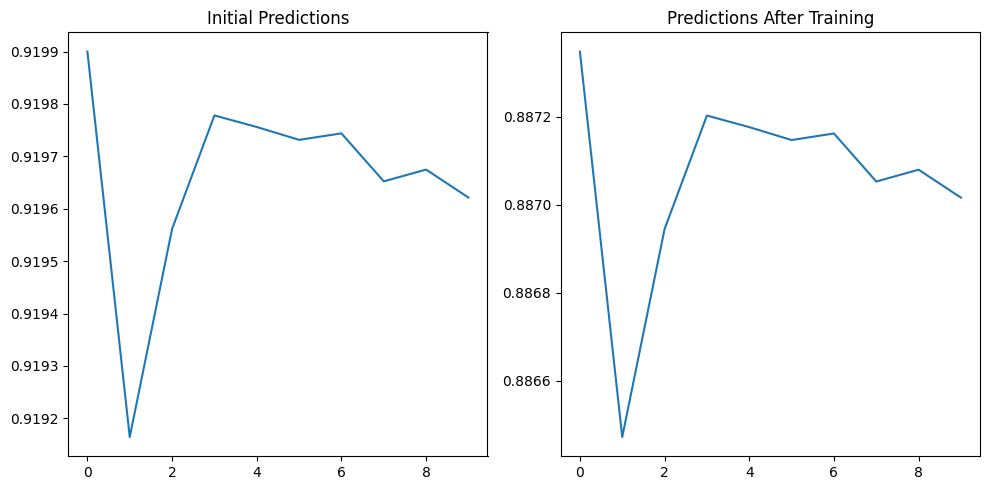

In [10]:
# Step 4: Visualization of before and after training
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(10), y=initial_predictions.flatten().numpy())
plt.title('Initial Predictions')

plt.subplot(1, 2, 2)
sns.lineplot(x=range(10), y=final_predictions.flatten().numpy())
plt.title('Predictions After Training')

plt.tight_layout()
plt.show()
